In [1]:
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es


In [2]:
os.chdir(r'C:\Users\Administrator\Documents\jupyter_notebooks\Geopython\Raster\datasets\L5_data')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'aoi.zip',
 'aoi_mysore.cpg',
 'aoi_mysore.dbf',
 'aoi_mysore.prj',
 'aoi_mysore.shp',
 'aoi_mysore.shx',
 'batch_subset',
 'data_subset',
 'LT05_L1TP_144052_20110203_20200823_02_T1_ANG.txt',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B1.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B1.TIF.aux.xml',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B2.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B3.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B4.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B5.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B6.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B7.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_GCP.txt',
 'LT05_L1TP_144052_20110203_20200823_02_T1_MTL.json',
 'LT05_L1TP_144052_20110203_20200823_02_T1_MTL.txt',
 'LT05_L1TP_144052_20110203_20200823_02_T1_MTL.xml',
 'LT05_L1TP_144052_20110203_20200823_02_T1_QA_PIXEL.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_QA_RADSAT.TIF',
 'LT05_L1TP_144052_20110203_20

In [4]:
files = glob('*B[1-7].TIF')

In [5]:
files

['LT05_L1TP_144052_20110203_20200823_02_T1_B1.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B2.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B3.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B4.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B5.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B6.TIF',
 'LT05_L1TP_144052_20110203_20200823_02_T1_B7.TIF']

In [6]:
output_path = os.getcwd() +'//output'

In [7]:
if os.path.exists(output_path):
    es.stack(files, out_path=output_path+'//stacked.tif')
else:
    os.mkdir(output_path)
    es.stack(files, out_path=output_path+'//stacked.tif')

CPLE_AppDefinedError: Deleting C:/Users/Administrator/Documents/jupyter_notebooks/Geopython/Raster/datasets/L5_data/output/stacked.tif failed: Permission denied

In [7]:
raster = rxr.open_rasterio('output/stacked.tif')

In [8]:
raster.ndim

3

In [9]:
raster.shape

(7, 6911, 7881)

In [10]:
norm_rst = (raster - raster.min()) / (raster.max() - raster.min())

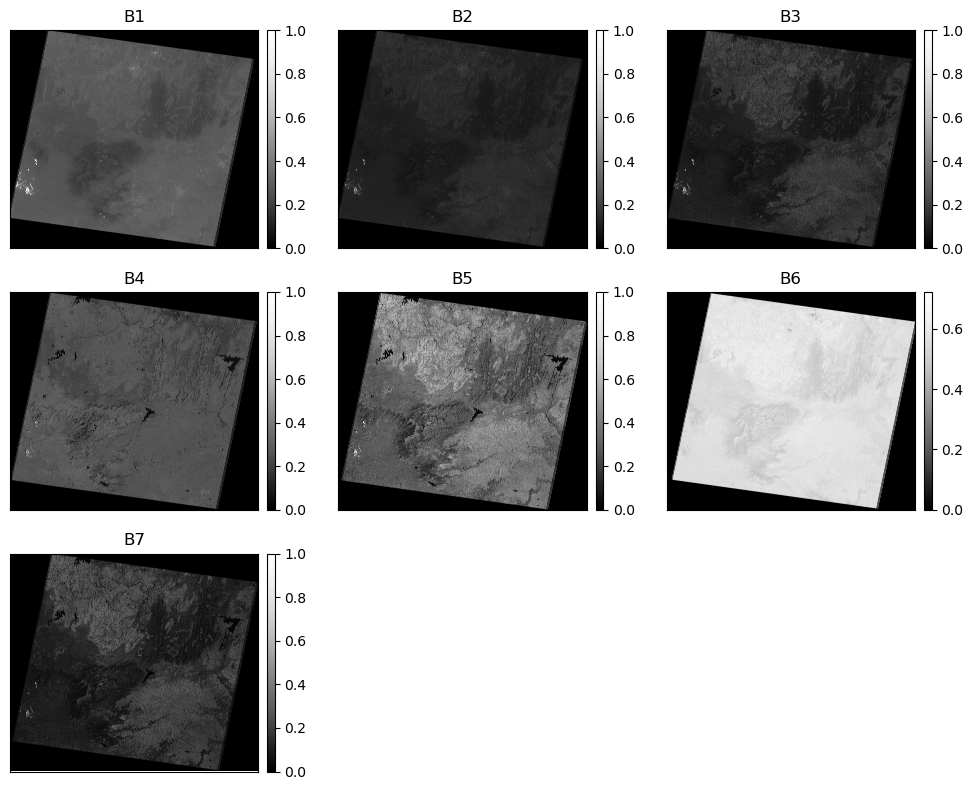

In [11]:
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

ep.plot_bands(norm_rst, title = bands, figsize = (10, 8), cols = 3)
plt.show()

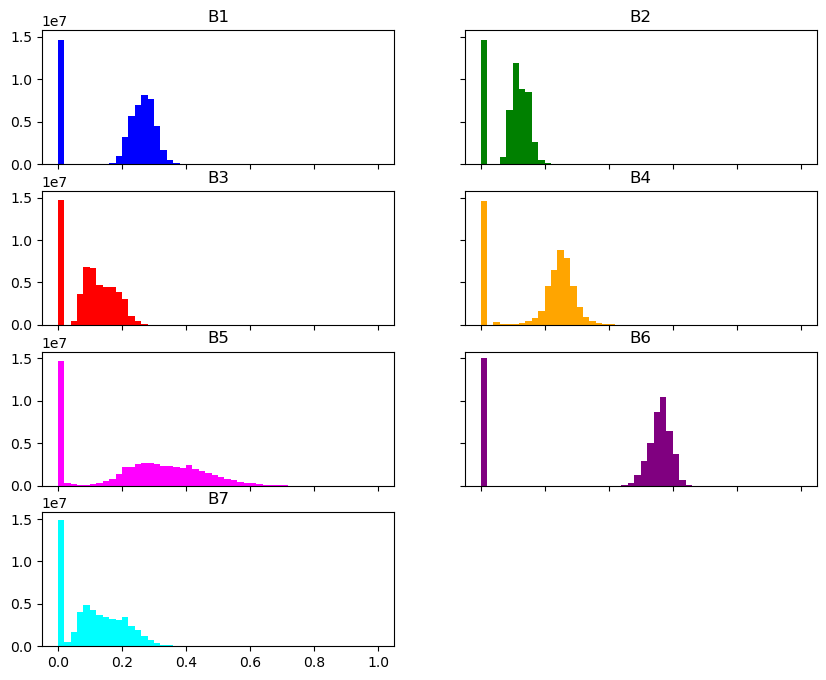

In [13]:
colors_list = ['Blue', 'green', 'red', 'orange', 'magenta', 'purple', 'cyan']

data = norm_rst.values

ep.hist(data, colors= colors_list, title= bands, figsize=(10, 8), cols=2, bins=50)
plt.show()

In [12]:
band_data = norm_rst.isel(band=0).values
print(band_data.shape)
print(band_data[4000:5000, 4000:5000])

(6911, 7881)
[[0.21960784 0.21568627 0.21176471 ... 0.27058824 0.27843137 0.2627451 ]
 [0.21176471 0.21176471 0.21176471 ... 0.30980392 0.30980392 0.27058824]
 [0.21176471 0.20784314 0.21960784 ... 0.32156863 0.30196078 0.26666667]
 ...
 [0.25098039 0.25882353 0.27058824 ... 0.27058824 0.2745098  0.28235294]
 [0.2627451  0.29803922 0.27058824 ... 0.28627451 0.25098039 0.26666667]
 [0.26666667 0.30196078 0.27058824 ... 0.27843137 0.29803922 0.27843137]]


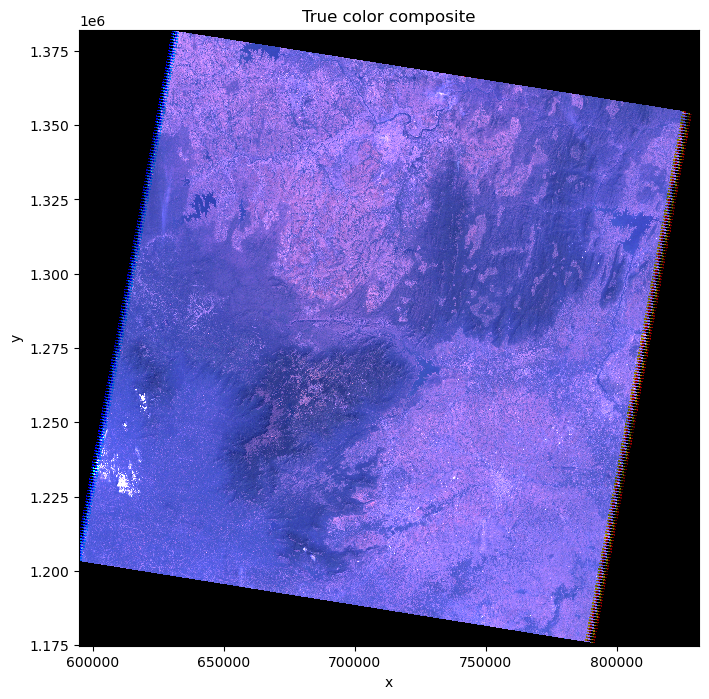

In [14]:
tcc = norm_rst.isel(band = [2, 1, 0]).transpose('y', 'x', 'band')

tcc.plot.imshow(robust = True, figsize = (8, 8))
plt.title('True color composite')
plt.show()

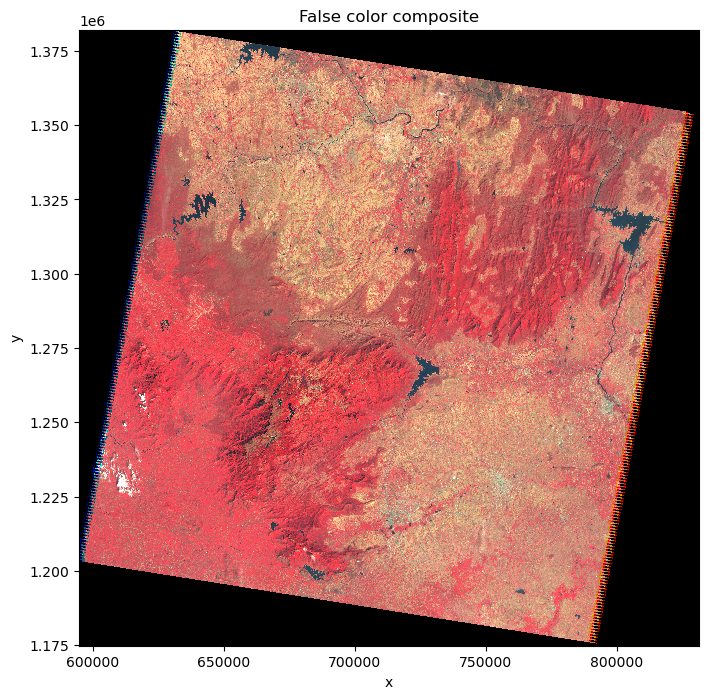

In [13]:
fcc = norm_rst.isel(band = [3, 2, 1]).transpose('y', 'x', 'band')

fcc.plot.imshow(robust = True, figsize = (8, 8))
plt.title('False color composite')
plt.show()

In [14]:
gdf = gpd.read_file('output/training_samples.geojson')

In [15]:
gdf.head(3)

,FID,class,id,layer,path,geometry
0,0.0,agri,None,agri,C:\Users\Administrator\Documents\jupyter_noteb...,POINT (76.55281 11.96468)
1,1.0,agri,None,agri,C:\Users\Administrator\Documents\jupyter_noteb...,POINT (76.63582 11.98077)
2,2.0,agri,None,agri,C:\Users\Administrator\Documents\jupyter_noteb...,POINT (76.60363 12.02397)


In [16]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FID       60 non-null     float64 
 1   class     102 non-null    object  
 2   id        0 non-null      object  
 3   layer     102 non-null    object  
 4   path      102 non-null    object  
 5   geometry  102 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 4.9+ KB


In [17]:
if gdf.crs == norm_rst.rio.crs:
    pass
else:
    gdf.to_crs(norm_rst.rio.crs, inplace=True)

In [18]:
gdf.crs == norm_rst.rio.crs

True

<Axes: >

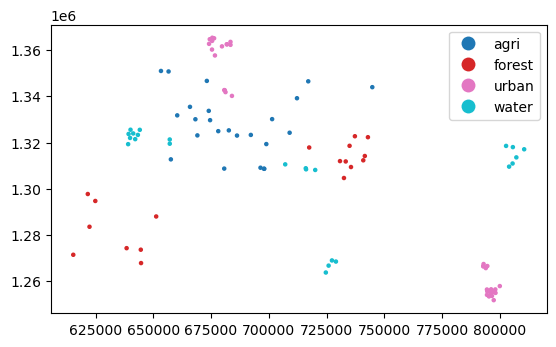

In [122]:
gdf.plot(column = 'class', legend = True, markersize = 5)

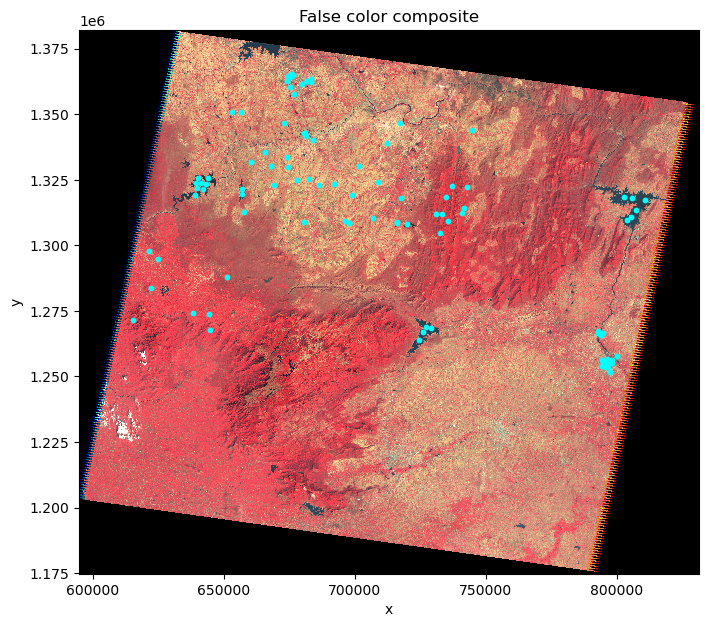

In [130]:
fig, ax = plt.subplots(figsize = (8, 8))

fcc.plot.imshow(ax = ax, robust = True)
plt.title('False color composite')

gdf.plot(ax = ax, color = 'cyan', markersize = 10)
plt.show()


In [70]:
sample_size = gdf['class'].value_counts()

In [71]:
sample_size

class
urban     36
agri      24
water     24
forest    18
Name: count, dtype: int64

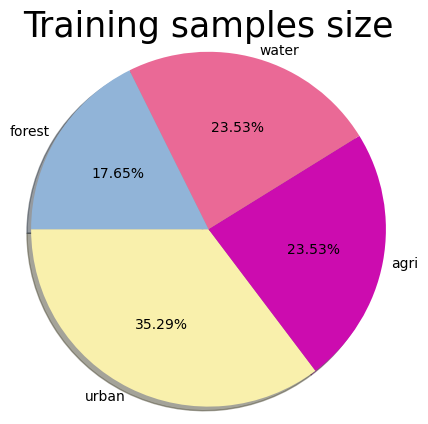

In [113]:
colors = ['#f9f0ac', '#cc0caf', '#ea6996', '#91b4d8']

plt.pie(sample_size, labels= sample_size.index, 
        autopct= '%1.2f%%',
        colors= colors,
        labeldistance= 1.05,
        shadow=True,
        radius = 1.2,
        startangle=180)
plt.title('Training samples size', fontdict= {
    'size' : 25
})
plt.show()

In [19]:
coords = [(x, y) for x, y in zip(gdf.geometry.x, gdf.geometry.y)]

In [20]:
samples = [norm_rst.sel(x = x, y = y, method = 'nearest').values for x, y in coords]

In [21]:
samples_df = pd.DataFrame(samples, columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'])

In [22]:
samples_df

,B1,B2,B3,B4,B5,B6,B7
0,0.294118,0.149020,0.200000,0.258824,0.556863,0.615686,0.274510
1,0.278431,0.141176,0.196078,0.266667,0.525490,0.623529,0.250980
2,0.294118,0.156863,0.219608,0.270588,0.588235,0.611765,0.286275
3,0.301961,0.152941,0.211765,0.270588,0.592157,0.615686,0.282353
4,0.278431,0.129412,0.176471,0.235294,0.498039,0.615686,0.247059
...,...,...,...,...,...,...,...
97,0.349020,0.172549,0.203922,0.219608,0.356863,0.568627,0.192157
98,0.364706,0.184314,0.223529,0.250980,0.435294,0.572549,0.231373
99,0.372549,0.184314,0.215686,0.231373,0.372549,0.560784,0.196078
100,0.356863,0.172549,0.211765,0.211765,0.376471,0.576471,0.219608


In [23]:
training_sample = samples_df.join(gdf['class'], how = 'left')

In [24]:
training_sample

,B1,B2,B3,B4,B5,B6,B7,class
0,0.294118,0.149020,0.200000,0.258824,0.556863,0.615686,0.274510,agri
1,0.278431,0.141176,0.196078,0.266667,0.525490,0.623529,0.250980,agri
2,0.294118,0.156863,0.219608,0.270588,0.588235,0.611765,0.286275,agri
3,0.301961,0.152941,0.211765,0.270588,0.592157,0.615686,0.282353,agri
4,0.278431,0.129412,0.176471,0.235294,0.498039,0.615686,0.247059,agri
...,...,...,...,...,...,...,...,...
97,0.349020,0.172549,0.203922,0.219608,0.356863,0.568627,0.192157,urban
98,0.364706,0.184314,0.223529,0.250980,0.435294,0.572549,0.231373,urban
99,0.372549,0.184314,0.215686,0.231373,0.372549,0.560784,0.196078,urban
100,0.356863,0.172549,0.211765,0.211765,0.376471,0.576471,0.219608,urban


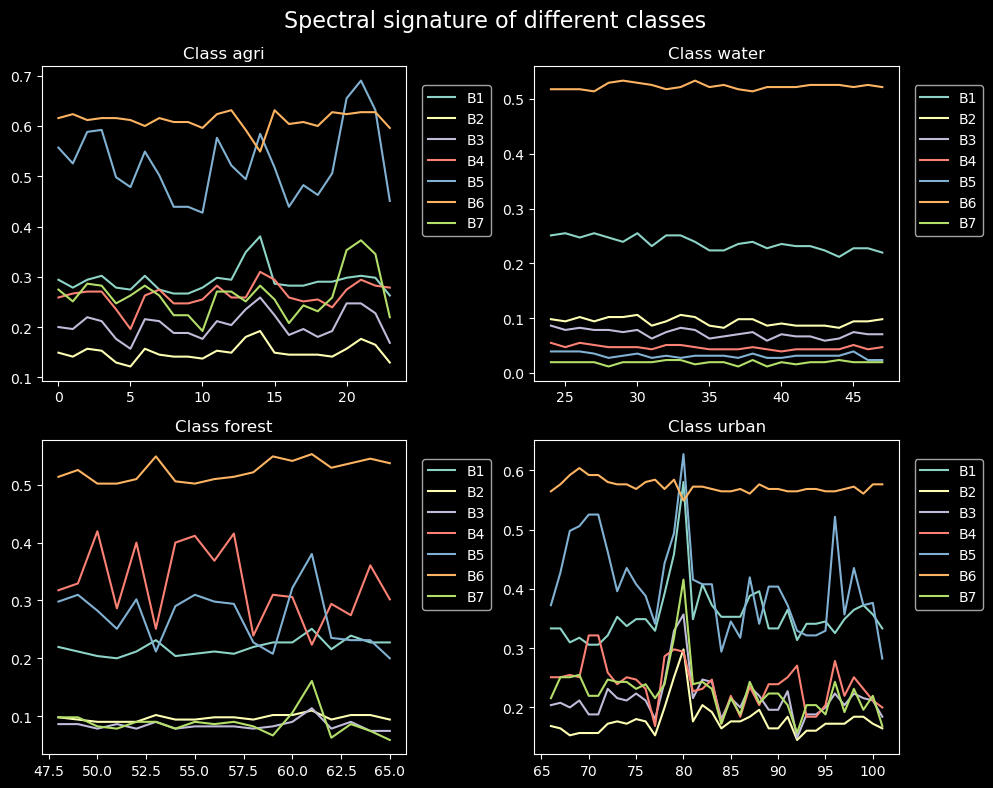

In [114]:
plt.style.use('dark_background')

fig, ax = plt.subplots(2, 2, figsize = (10, 8))

axes = ax.flatten()

classes = training_sample['class'].unique()

for i, j in enumerate(classes):
    x = training_sample[training_sample['class'] == j]
    x.plot(ax = axes[i], legend = True)
    axes[i].set_title(f'Class {j}')
    axes[i].legend(loc = 'right', bbox_to_anchor = (1.25, 0.7))

fig.suptitle('Spectral signature of different classes', fontsize=16)
plt.tight_layout()
plt.show()
    

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
training_sample.head()

,B1,B2,B3,B4,B5,B6,B7,class
0,0.294118,0.149020,0.200000,0.258824,0.556863,0.615686,0.274510,agri
1,0.278431,0.141176,0.196078,0.266667,0.525490,0.623529,0.250980,agri
2,0.294118,0.156863,0.219608,0.270588,0.588235,0.611765,0.286275,agri
3,0.301961,0.152941,0.211765,0.270588,0.592157,0.615686,0.282353,agri
4,0.278431,0.129412,0.176471,0.235294,0.498039,0.615686,0.247059,agri


In [27]:
class_map = {
    'agri': 0,
    'water': 1,
    'forest': 2,
    'urban': 3
}

training_sample['value'] = training_sample['class'].map(class_map)

In [28]:
training_sample['value'] = training_sample['value'].astype('category')

In [29]:
training_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   B1      102 non-null    float64 
 1   B2      102 non-null    float64 
 2   B3      102 non-null    float64 
 3   B4      102 non-null    float64 
 4   B5      102 non-null    float64 
 5   B6      102 non-null    float64 
 6   B7      102 non-null    float64 
 7   class   102 non-null    object  
 8   value   102 non-null    category
dtypes: category(1), float64(7), object(1)
memory usage: 6.8+ KB


In [30]:
X = training_sample.drop(columns=['class', 'value'])
y = training_sample['value']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
prediction = model.predict(X_test)

In [35]:
prediction

array([1, 3, 2, 1, 1, 1, 3, 1, 0, 0, 0, 1, 3, 3, 3, 0, 3, 1, 0, 1, 3],
      dtype=int64)

In [36]:
accuracy_score(prediction, y_test)

1.0

In [37]:
new_df = pd.DataFrame(columns = bands)

for i, j in enumerate(bands):
    value = norm_rst.isel(band = i).values.flatten()

    new_df[j] = value
    


In [38]:
new_df.shape

(54465591, 7)

In [40]:
new_df.describe()

,B1,B2,B3,B4,B5,B6,B7
count,5.446559e+07,5.446559e+07,5.446559e+07,5.446559e+07,5.446559e+07,5.446559e+07,5.446559e+07
mean,1.957472e-01,9.080278e-02,9.984076e-02,1.823726e-01,2.493892e-01,4.053197e-01,1.107184e-01
std,1.239069e-01,5.969697e-02,7.347751e-02,1.177335e-01,1.812149e-01,2.517799e-01,9.000070e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.509804e-01,1.098039e-01,1.058824e-01,2.352941e-01,2.745098e-01,5.450980e-01,1.058824e-01
75%,2.823529e-01,1.333333e-01,1.568627e-01,2.666667e-01,3.882353e-01,5.725490e-01,1.803922e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.215686e-01,1.000000e+00


In [41]:
predicted = model.predict(new_df)

In [44]:
np.unique(predicted, return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([10855633, 15358835, 21777325,  6473798], dtype=int64))

In [135]:
norm_rst.shape

(7, 6911, 7881)

In [45]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['Yellow', 'blue', 'green', 'Red'])

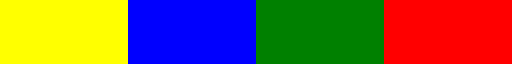

In [46]:
cmap

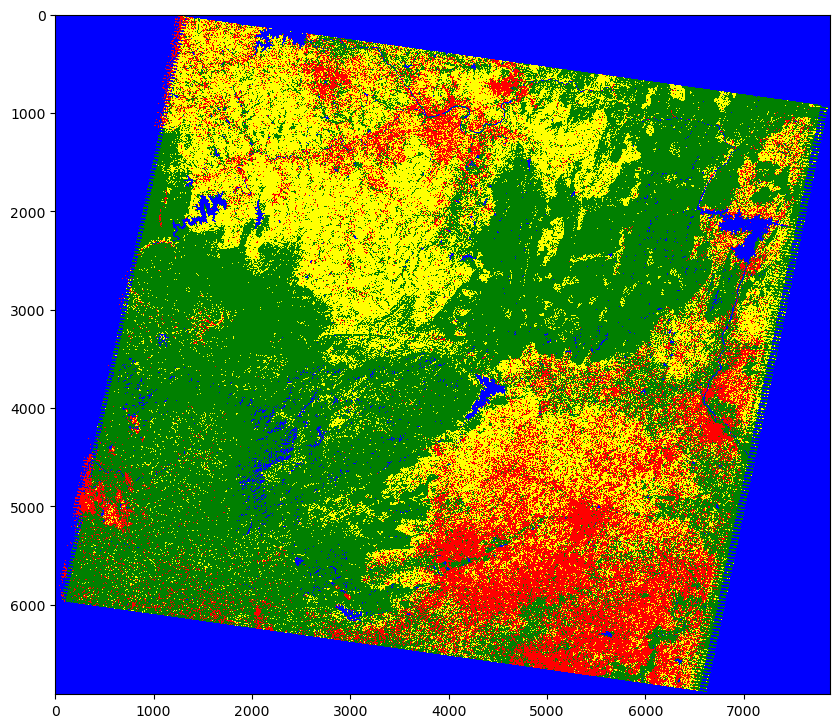

In [47]:
prediction_image = predicted.reshape(norm_rst.shape[1], norm_rst.shape[2])

# Show to plot
plt.figure(figsize=(10, 10))
plt.imshow(prediction_image, cmap=cmap, interpolation="nearest")

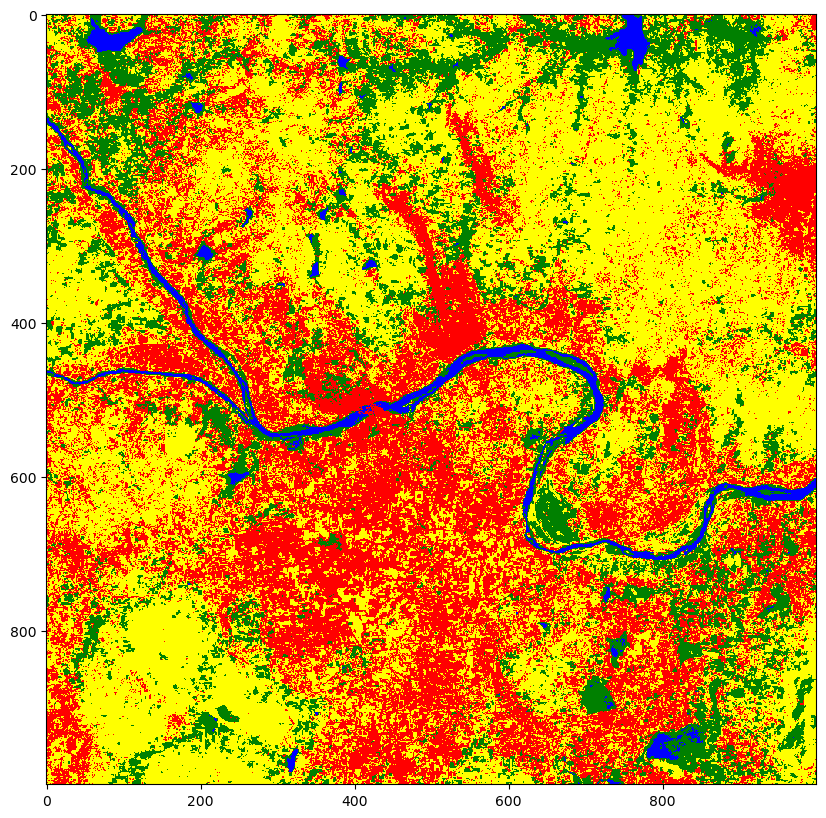

In [48]:
plt.figure(figsize=(10, 10))
plt.imshow(prediction_image[500:1500, 3500:4500], cmap=cmap, interpolation="nearest")

In [49]:
classes, counts = np.unique(predicted, return_counts=True)

In [106]:
class_area = {
    'land_cover' : class_map.keys(),
    'count' : counts.tolist()
}
class_area = pd.DataFrame(class_area)
class_area.set_index('land_cover', drop = True, inplace=True)

In [110]:
class_area

,count
land_cover,
agri,10855633
water,15358835
forest,21777325
urban,6473798


In [ ]:
colors = []

for i in range(7):
    color = randomcolor.RandomColor().generate()
    temp = color[0] 
    colors.append(temp)

print(colors)

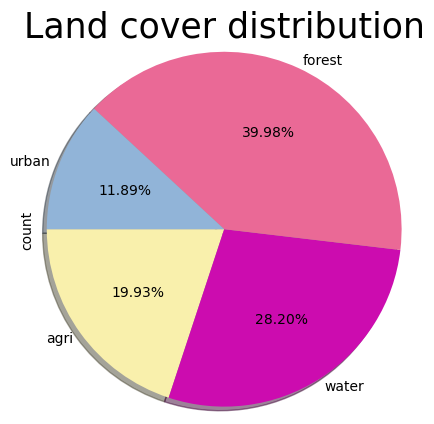

In [123]:
class_area.plot(kind = 'pie', x = 'land_cover', y = 'count', legend = False,
                autopct= '%1.2f%%',
                colors= colors,
                labeldistance= 1.05,
                shadow=True,
                radius = 1.2,
                startangle=180)
plt.title('Land cover distribution', fontdict= {
    'size' : 25
})
plt.show()
